In [7]:
from test import *


        sinx      cosx
0   0.841471  0.540302
1   0.909297 -0.416147
2   0.141120 -0.989992
3  -0.756802 -0.653644
4  -0.958924  0.283662
..       ...       ...
95  0.983588 -0.180430
96  0.379608 -0.925148
97 -0.573382 -0.819288
98 -0.999207  0.039821
99 -0.506366  0.862319

[100 rows x 2 columns]


/home/yuyouyu/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


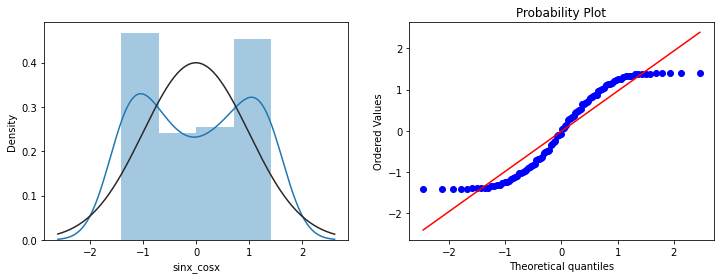

Fitting 50 folds for each of 81 candidates, totalling 4050 fits
------ train_r2 1.0000 ------ test_r2 1.0000 ------
------ train_er 1.0000 ------ test_er 1.0000 ------


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [12]:
X,y = data_process(
    path='test.csv',
    x_start=2,
    x_end=3,
    target="sinx_cosx"
)

# model_Ridge(X,y,param={'alpha': np.arange(0.25,6,0.25)})
# #
# model_Lasso(X,y,param={'alpha': np.arange(1e-4,1e-3,4e-5)})

model_elasticNet(X,y,param={'alpha': np.arange(1e-4,1e-3,1e-4),
                'l1_ratio': np.arange(0.1,1.0,0.1),
                'max_iter':[1000]
                            })

# model_KNeighbors(X,y,param={'n_neighbors':np.arange(1,11,1)})

# model_SVR(X,y,param={'C':np.arange(1,20,1)
#                      })

# model_GB(X,y,param={'n_estimators':np.arange(150,351,100),
#               'max_depth':np.arange(1,4,1),
#               'min_samples_split':np.arange(5,8,1)})

model_rf(X,y,param={'n_estimators':np.arange(100,251,50),
                'max_features':np.arange(8,21,4),
                'min_samples_split':np.arange(2,7,2)})

# model_xgb(X,y,param={'n_estimators':np.arange(1,10,20),  # 分类树数量
#                      "max_depth": np.arange(3, 4, 2),  # 每颗树的搜索深度
#                      "eta":[0.3]  # 学习率,写死
#                      }
#                       )

opt_models = pd.DataFrame(opt_models)
print(opt_models)
#opt_models.to_csv('result.csv')

In [ ]:
test

In [ ]:
for key in test.values():
    print(key[2])

In [ ]:
from Hyper_Optimize import __indent

In [ ]:
def _add_info_xml(picture_name, result_models) -> None:
    try:
        import xml.etree.cElementTree as ET
    except ImportError:
        import xml.etree.ElementTree as ET
    import os
    # Back up result.xml
    os.system('cp ./result.xml ./result_before.xml')  # Linux
    # os.system('copy .\\result.xml .\\result_before.xml')    # Win

    tree = ET.parse("./result.xml")
    root = tree.getroot()
    output = tree.find('output')

    # Models
    for module_name, module_para in result_models.items():
        element_module = ET.Element(module_name)
        for para_name, para_value in module_para[1].items():
            element_para = ET.Element(para_name)
            try:
                element_para.text = str(round(para_value, 6))
            except:
                element_para.text = str(para_value)
            element_module.append(element_para)
        element_R2 = ET.Element('R2')
        element_R2.text = str(round(module_para[2], 6))
        element_module.append(element_R2)
        output.append(element_module)
    # Picture
    element_pictures = ET.Element('Distribution_Chart')
    element_picture = ET.Element('picture')
    element_file, element_name, element_url = ET.Element('file'), ET.Element('name'), ET.Element('url')
    element_name.text, element_url.text = picture_name, picture_name
    element_file.append(element_name)
    element_file.append(element_url)
    element_picture.append(element_file)
    element_pictures.append(element_picture)
    output.append(element_pictures)

    # Save
    __indent(root)
    ET.tostring(root, method='xml')

    tree.write('result.xml', encoding='utf-8', xml_declaration=True)
    with open('result.xml', 'r') as fp:
        lines = [line for line in fp]
        lines.insert(1, '<?xml-stylesheet type="text/xsl" href="/XSLTransform/Hyper_Optimize.xsl" ?>\n')
    with open('result.xml', 'w') as fp:
        fp.write(''.join(lines))

In [ ]:
_add_info_xml('aaa', test)